# Теплопроводность и диффузия

### Реализовать численное решение уравнения теплопроводности с помощью метода конечных разностей для представленного выше случая, построить график распределения температуры по толщине пластины.


Уравнение теплопроводности имеет вид:

$\rho C\frac{\partial T}{\partial t} = \lambda\frac{\partial^2 T}{\partial x^2}$

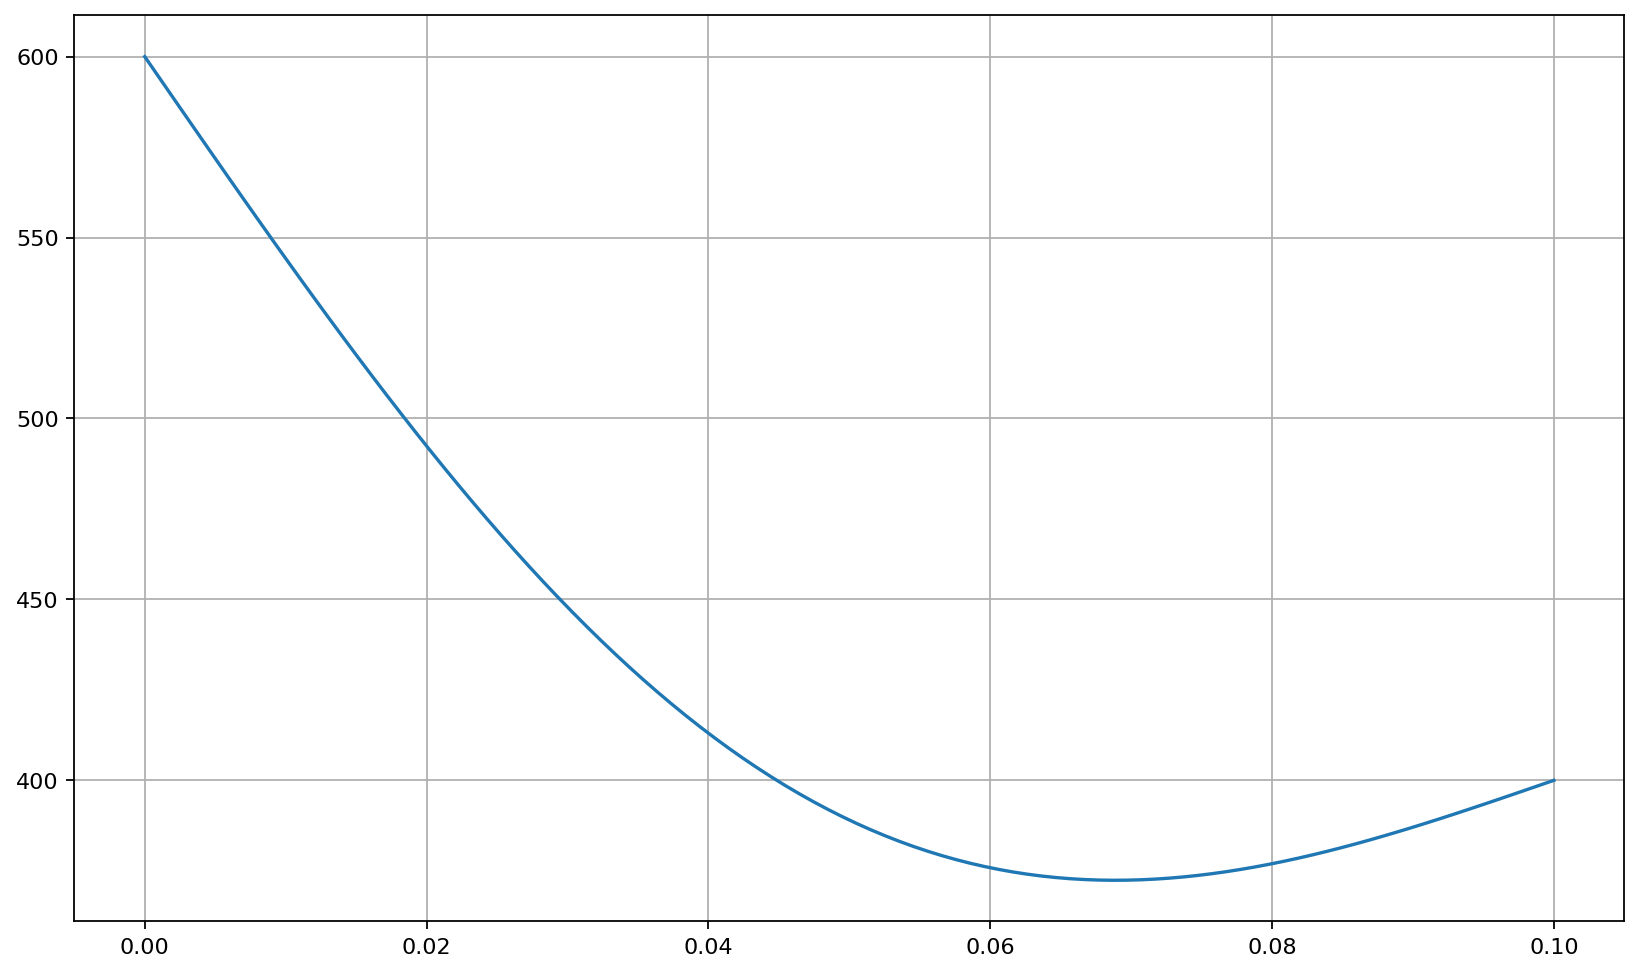

In [31]:
import numpy as np
import matplotlib.pyplot as plt

T0 = 300
Tl = 600
Tr = 400
L = 0.1
lam = 50
C = 460
p = 7800
t = 60

N = 100 # число отрезков при разбиении по координате
K = 100 # число отрезков при разбиении по времени

tau = t / K
h = L / N

A = lam / (h**2)
B = 2 * lam / (h**2) + p * C / tau
F = np.zeros(N)
alpha = np.zeros(N)
beta = np.zeros(N)

alpha[0] = 0;
beta[0] = Tl

T = np.zeros((N, K), dtype = np.float64)
T[0][0] = Tl
T[N - 1][0] = Tr
for i in range(1, N - 1):
    T[i][0] = T0

for k in range(1, K):
    for i in range(0, N):
        F[i] = - p * C * T[i][k - 1] / tau

    for i in range(1, N):
        alpha[i] = A / (B - A * alpha[i - 1]);
        beta[i] = (A * beta[i - 1] - F[i]) / (B - A * alpha[i - 1]);


    T[N - 1][k] = Tr
    
    for i in range(0, N - 1):
        T[N - 2 - i][k] = alpha[N - 2 - i] * T[N - 1 - i][k] + beta[N - 2 - i]; 

x = np.linspace(0, L, N)
y = []
for i in range(0, N):
    y.append(T[i][K - 1])

fig, ax = plt.subplots(figsize=(12.5, 7.5), dpi = 160)

ax.plot(x, y, '-')
plt.grid()
plt.show()